In [ ]:
# Задание №1
"""
Из числа жителей большого города были случайно выбраны 1000 человек. 
Их спросили, довольны ли они качество воздуха в городе. 78% опрошенных ответили "да". 
Что можно с уверенностью утверждать, исходя из данных опроса?


1. 78% жителей этого города довольны качеством воздуха в городе.
2. Если случайно выбрать другую тысячу человек из этого же города, 78% из них ответят, что довольны качеством воздуха в городе.
3. Если случайно выбрать 1000 человек из другого города, процент довольных качеством воздуха будет таким же
"""

# Ответ: 
"""

а) Ничего из перечисленного

"""

In [ ]:
# Задание №2

"""
Вам даны две базы данных с информацией о студентах и их оценках. 
Вам нужно выяснить, какие студенты имеют средний балл выше определенного порога и составить рейтинг студентов по этому критерию. 
Опишите, как вы бы проанализировали эти данные и какие шаги бы вы предприняли для выполнения этой задачи.
"""

# Решение:
"""

По-скольку количество групп и порог не определены, то можно поступить следующим образом:
  посчитать средний балл для каждого студента и общий средний балл для представленных в базе данных студентов, 
  а потом посмотреть квантили распределения

В зависимости от того, на сколько групп мы хотим поделить студентов, можно предложить несколько подходов.

Для трех групп: первый квартиль будет определять худших 25% и верхнее значение квартиля будет устанавливать нижний порог
 (который я предлагаю использовать независимо от дальнейшего деления на группы),
 четвертый квартиль будет определять лучших 25% студентов, а оставшиеся будут среднячками

Для четырех групп: каждый квартиль и попавшие в него студенты определяет группу

Для другого числа групп: (75% / количество групп) = Х;  от 25% до 25%+Х, от 25%+Х до 25%+2Х, от 25%+2Х до 25%+3X и т.д. - рейтинг студентов по группам
Например для 10 групп мы получим следующие промежутки: от 25 до 32.5%, от 32.5% до 40%, от 40% до 47.5%, от 47.5% до 55% и т.д.

Альтернативным способом посчитать рейтинг является ранжирование студентов по средней оценке, 
  где порогом может выступить другие выбранные Х процентов студентов и получившееся значение баллов

"""

# 3.1
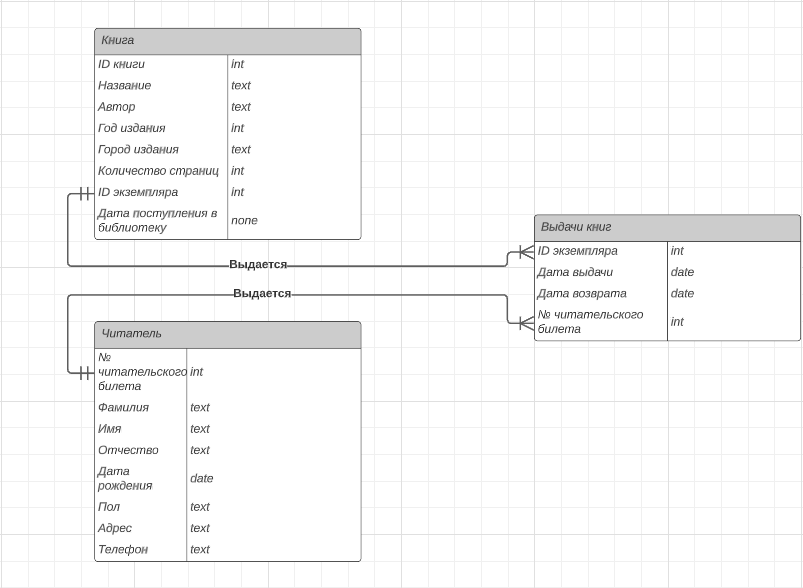


In [ ]:
# Задание 3.1.1 Определите соответствует ли модель данных 3 нормальной форме. 


# Ответ:
"""

id книги может повторяться для разных id экземпляра, таким образом, как только появится больше одного экземпляра одной книги 
модель данных перестанет соответствовать первой нормальной форме, и соответственно и третьей 
Чтобы это исправить нужно будет создать отдельную таблицу вида | id_экземпляра | id_книги | 

"""

# Задание 3.2<br/>
Создайте базу данных и заведите таблицы*. <br/>
Загрузите предоставленные семплы данных. (Приложите скрин, каждой загруженной таблицы).<br/>

таблица книги <br/> 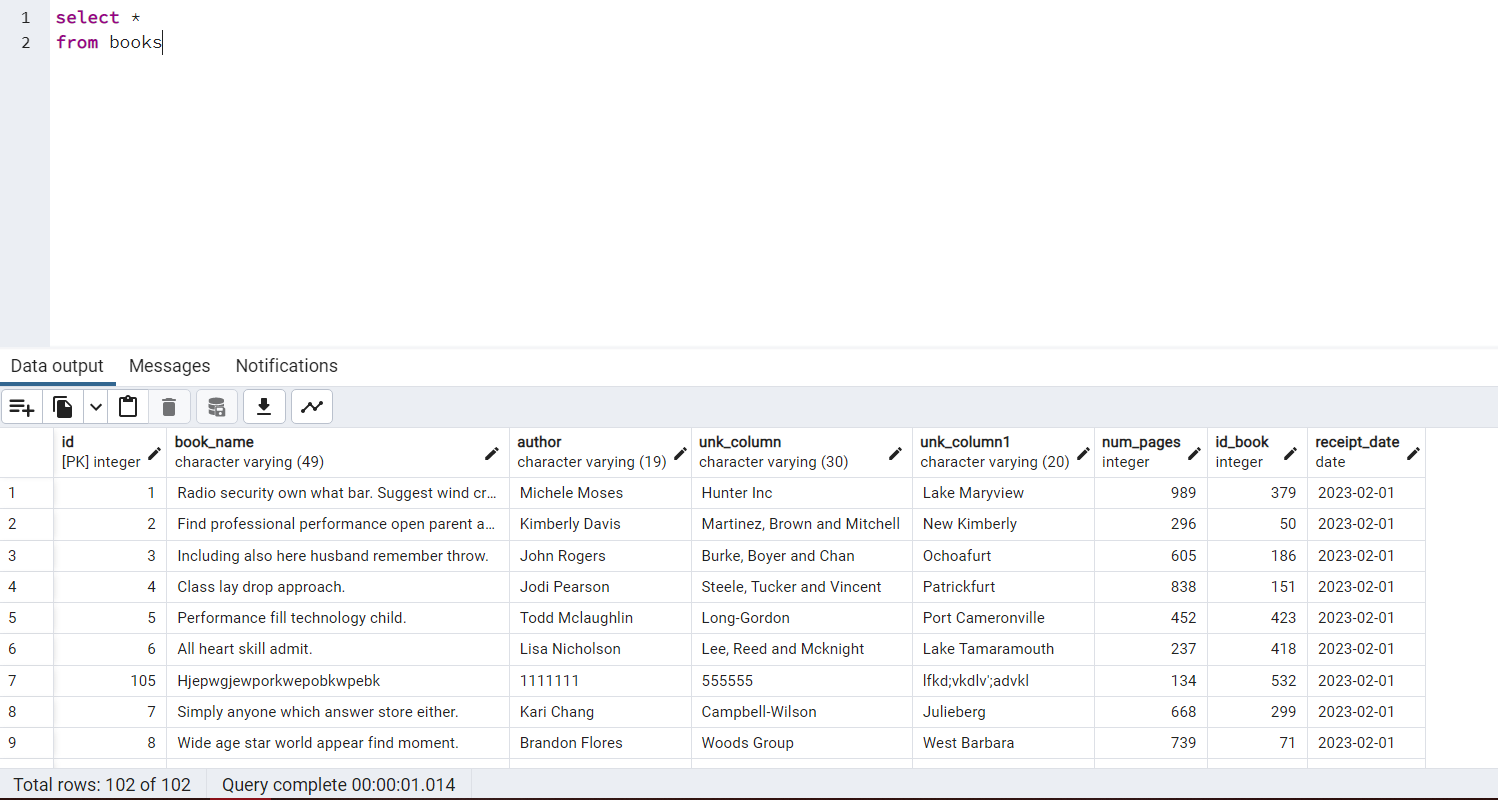 <br/>
таблица выдачи книг <br/> 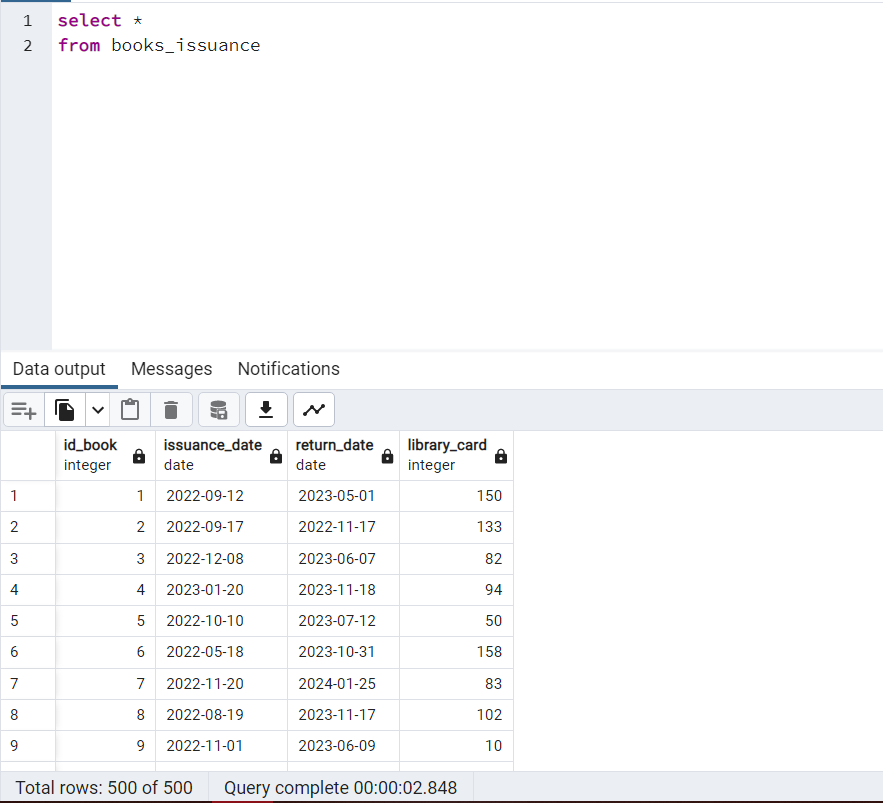 <br/>
таблица читатели <br/> 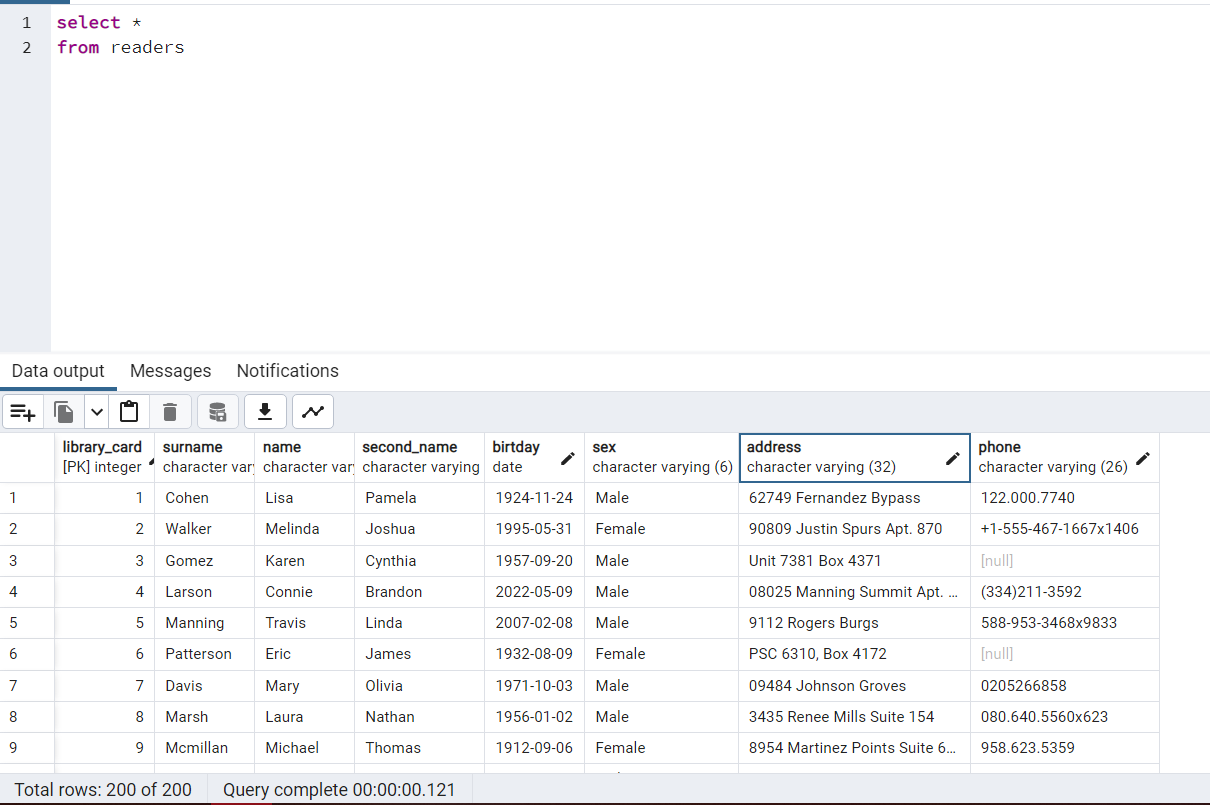 <br/>

In [ ]:
# Задача 3.3  Оцените качество/корректность предоставленных сэмплов данных


"""

1. Все данные естественно вымышлены и книг (по крайней мере что погуглил) не существует <br/>

2. Неопознанные символы в качестве названий столбцов <br/>

3. В книгах в качестве id экзепляра указаны 199_1, 11.���, 0_7, значения не соответствуют заявленным названиям столбцов таблицы, id не по порядку, есть просто плохие строки вроде строки с id 105 <br/>

4. В читателях явно проблемы с номерами телефонов, они то отсутствуют, то указаны в непонятном формате (816-779-3301x17116), и по адресам видно, что они тоже недействительны (Unit 7381 Box 4371),  <br/>
    перепутан адрес и номер телефона, десяток Null, читатели возрастом от года (id читателя 67) <br/>

5. В выдаче дата возврата 24 год, возможно дата планируемого возврата, но если фактического - явно неверно.  <br/>
    дата когда взяли книгу 2202 и 0022 тоже радует), есть дубликаты (id_book 10, 11, 12..), и где-то книгу брали до того, как ее вернули по дате (id_book 33) <br/>

"""

In [ ]:
# 3.3.2 Напишите sql - запросы с помощью которых мы можем выявить ошибки в данных (количество запросов не ограничено, необходимо приложить текст запроса/запросов).


#1. дубликаты:

"""
SELECT count(*) FROM TABLE -- посмотреть на количество строк
SELECT DISTINCT * FROM TABLE -- посмотреть на количество уникальных строк
"""

"""
SELECT *
FROM (
    SELECT id_book, issuance_date, return_date, library_card, count(*)
    FROM books_issuance
    GROUP BY 1, 2, 3, 4
    )tmp
WHERE count > 1 --отобразятся строки, у которых есть полный дубликат
"""

#2. Проверка на null в значениях:

"""
SELECT *
FROM readers
WHERE NOT readers IS NOT null
"""


#3. Проверить "невозможные" значения:

"""
SELECT *
FROM books_issuance
ORDER BY return_date -- asc/desc чтобы сразу видеть предельные значения разных столбцов
"""

In [ ]:

# Задание  3.4

"""
1. Найти города, в которых в 2016 году было издано больше всего книг;
2. Вывести количество экземпляров книг «Война и мир» Л.Н.Толстого, которые находятся в библиотеке;
3. Найти читателей, которые за последний месяц брали больше всего книг в библиотеке. При выводе выполнить сортировку читателей по возрасту (от молодых к старшим).
"""

# 1.

"""

select distinct город, count
from (
    select *, count(дата_издания) over(partition by город)
    from таблица
    where EXTRACT(year FROM дата_издания) = 2016
    )tmp
order by count desc

"""

# 2.

"""

select count(*)
from книги
join выдачи_книг on выдачи_книг.id_книги = книги.id_книги
where книги.название = 'Война и мир'
	and книги.автор = 'Л.Н.Толстой'
	and выдачи_книг.дата_выдачи < now()
	and выдачи_книг.дата_возврата < now()

"""

# 3. 

"""

select distinct *
from(
	select выдачи_книг.№_читательского_билета, 
		читатели.фамилия, 
		читатели.имя, 
		читатели.отчество, 
		count(id_экземпляра) over(partition by №_читательского_билета)
	from читатели
	join выдачи_книг on выдачи_книг.№_читательского_билета = читатели.№_читательского_билета
	where выдачи_книг.дата_выдачи > now() - interval '1 month'
	)tmp
order by count desc, читатели.дата_рождения desc

"""

# 3.5 Доработать логическую модель данных (ЛМД) <br/>
 таким образом, чтобы можно было хранить данные о сотрудниках библиотеки, <br/>
 которые выдали книгу читателю. Нарисовать ER - диаграмму получившейся ЛМД. <br/>

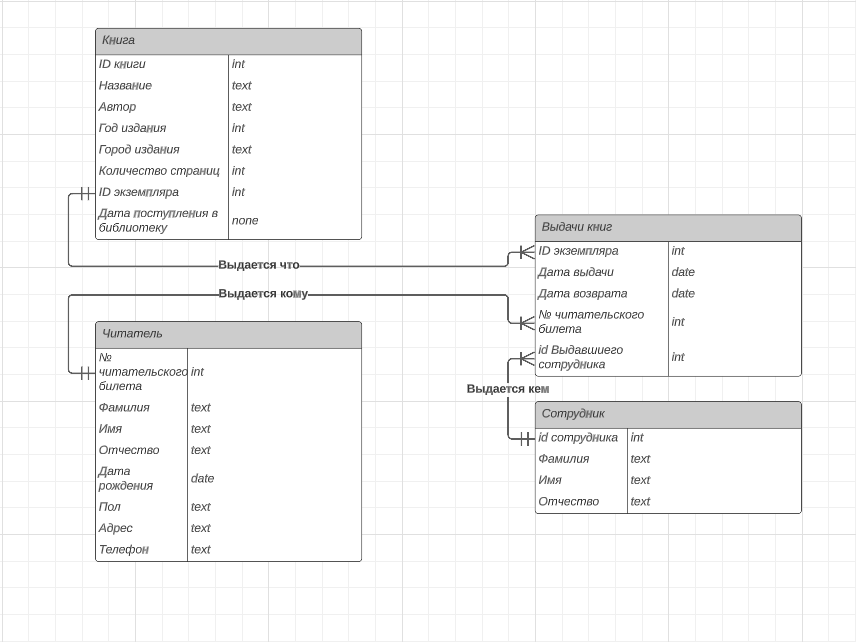